<img src= "malariacell.png">

## Sıtma Verileri için CNN ile Görüntü Sınıflandırması

Bu proje, özellikle verileri kullanarak sıtma tespiti için bir evrişimli sinir ağı (Convolutional Neural Network - CNN) oluşturmayı içeriyor. Bu tür bir model, görüntü sınıflandırma görevleri için oldukça etkilidir. Projenin adımlarını aşağıda bulabilirsiniz:

1. **Veri İndirme ve Hazırlama:**
   İlk adım, belirttiğiniz linklerden veri kümesini indirmektir. Bu veri kümesi, "Infected" (Enfekte) ve "Uninfected" (Enfekte Olmayan) olarak etiketlenmiş iki klasöre sahip görüntüler içerir. Toplam 27,558 görüntü bulunmaktadır.

2. **Veriyi Anlama ve Görselleştirme:**
   Veriyi inceleyerek içeriğini anlayın. Birkaç örnek görüntüyü görüntüleyerek veri hakkında fikir sahibi olun. Görüntülerin boyutları, renk skalası ve enfekte ve enfekte olmayan sınıflar arasındaki dağılım gibi önemli bilgileri inceleyin.

3. **Veriyi Bölme:**
   Veriyi eğitim, doğrulama ve test kümelerine bölmelisiniz. Tipik olarak, verinin %70-80'i eğitim, %10-15'i doğrulama ve %10-15'i test için kullanılır.

4. **Veri Ön İşleme:**
   Veriyi modelinize beslemeye uygun hale getirmelisiniz. Bu adımlar arasında görüntü boyutlarını yeniden ölçeklendirme, normalizasyon, veri artırma (data augmentation) gibi işlemler bulunabilir.

5. **CNN Modelinin Oluşturulması:**
   Evrişimli sinir ağı (CNN) modelinizi oluşturmalısınız. Keras, TensorFlow gibi kütüphaneler, bu tür modelleri oluşturmak için sıkça kullanılır. Modelinizi belirlerken katmanları (evrişim, havuzlama, tam bağlantı), aktivasyon fonksiyonlarını, düşük bırakma (dropout) gibi düzenlemeleri düşünmelisiniz.

6. **Modeli Eğitme:**
   Oluşturduğunuz modeli eğitim verisi üzerinde eğitin. Model, eğitim verisini görüntüler ve etiketler arasındaki ilişkiyi öğrenir. Eğitim sırasında kayıp fonksiyonu ve optimizasyon algoritması seçilmelidir.

7. **Doğrulama ve Hiperparametre Ayarı:**
   Eğitim sırasında modelin performansını doğrulama verisi üzerinde izleyin. Modelinizin aşırı uyuma (overfitting) veya düşük performans gösterip göstermediğini değerlendirin. Gerekirse hiperparametreleri (örneğin, öğrenme hızı, dropout oranı) ayarlayarak modelinizi iyileştirin.

8. **Test ve Değerlendirme:**
   Eğitim tamamlandığında, modeli test verisi üzerinde değerlendirin. Modelin doğruluğunu, kesinliği, hassasiyeti ve geri çağırma gibi metriklerle değerlendirin. Bu, modelinizin gerçek dünya verilerinde nasıl performans gösterdiğini anlamanıza yardımcı olacaktır.

9. **Sonuçların Görselleştirilmesi:**
   Modelinizin test verilerindeki performansını görselleştirerek ve örnek tahminlerle destekleyerek sonuçları anlatın.

10. **Dağıtım ve Kullanım:**
   Modeliniz başarıyla eğitildiğinde, gerçek dünya uygulamalarında kullanılabilir hale getirebilirsiniz. Bu, yeni görüntülerinizi modelinize besleyerek sıtma enfeksiyonlarını tespit edebilirsiniz.


In [1]:
# Kütüphaneler ve modüller içe aktarılıyor:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

## 1. **Veri İndirme (Okuma) ve Hazırlama:**

In [4]:
print(os.listdir("../10-Image Classification CNN for Malaria/cell_images"))

['Parasitized', 'Uninfected']


Bu satır, belirtilen dizideki "cell_images" içindeki dosya ve klasör adlarını train_dataadlı bir liste olarak alır. Bu genellikle bir veri ayarındaki ana klasörleri içerir.

In [5]:
train_data = os.listdir("../10-Image Classification CNN for Malaria/cell_images/")

Bu satırlar, "Parasitized" adlı bir klasör içinde bulunan enfekte (parazitli) görüntü hücrelerini listeleyip ilk 10 tanesini görüntüler. Bu, veri kümesinin parazitli görüntü sınıfına ait örnekleri temsil eder.
"Uninfected" adlı bir klasör içinde bulunan enfeksiyonlu olmayan (temiz) görüntü hücrelerini listeleyip ilk 10 tanesini görüntüler. Bu, veri ayarının temiz görüntü sınıfına ait örnek temsilidir.

In [6]:
parasitized_data = os.listdir("../10-Image Classification CNN for Malaria/cell_images/Parasitized/") #Parazitli örnek
print(parasitized_data[:10]) 

uninfected_data = os.listdir("../10-Image Classification CNN for Malaria/cell_images/Uninfected/")#Parazitsiz temiz örnek
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']
['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


## 2. **Veriyi Anlama ve Görselleştirme:**

**Parazitli Veri Görselleştirmesi**

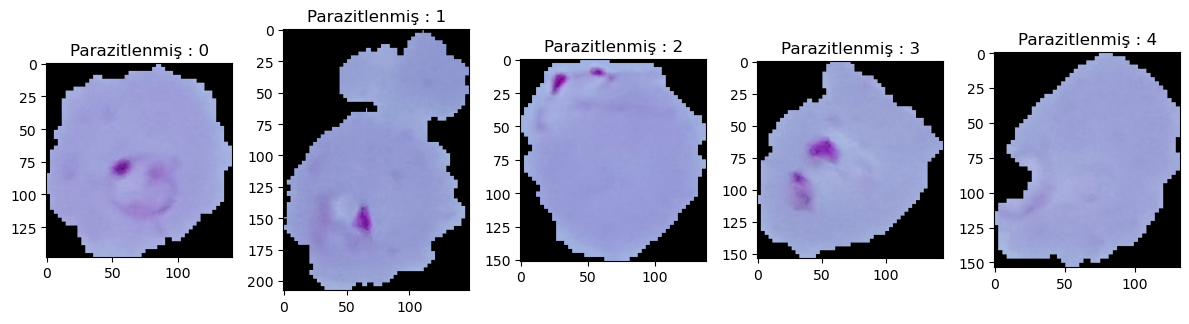

In [11]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("../10-Image Classification CNN for Malaria/cell_images/Parasitized" + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('Parazitlenmiş : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

**Parazitsiz Veri Görselleştirmesi**

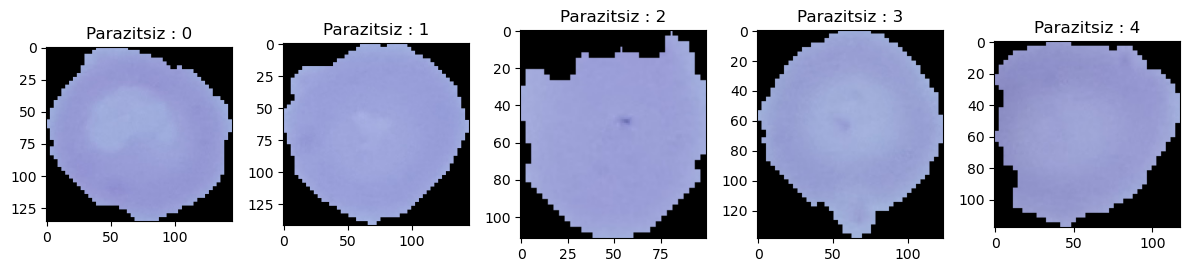

In [12]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("../10-Image Classification CNN for Malaria/cell_images/Uninfected" + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('Parazitsiz : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

## 3. **Veri Ön İşleme:**
   Veriyi modelinize beslemeye uygun hale getirmelisiniz. Bu adımlar arasında görüntü boyutlarını yeniden ölçeklendirme, normalizasyon, veri artırma (data augmentation) gibi işlemler bulunabilir.

In [15]:
from keras.preprocessing.image import ImageDataGenerator

#veri artırma nesnesi oluştur
datagen=ImageDataGenerator(rescale=1./255)

#veri yolu: 
train_path="../10-Image Classification CNN for Malaria/cell_images"

train_generator=datagen.flow_from_directory(train_path, target_size=(128,128),
                                            batch_size=32,class_mode="binary")

Found 27558 images belonging to 2 classes.


ImageDataGenerator sınıfının bir örneği olan datagennesnesi oluşturur. Burada kullanılan rescaleparametreler, görüntü piksellerinin 0 ile 255 arasındaki değerleri 0 ile 1 aralığında yeniden ölçekler. Bu, modelin daha iyi öğrenmesine yardımcı olabilir.

train_path değişkeni, eğitim verilerinin içerdiği dizini belirtir. Bu dizin içinde sınıf klasörleri bulunur ve her bir klasör bir sınıfı temsil eder.

flow_from_directory()Fonksiyon, verileri belirtilen diziden yükleyerek veri üreteci (jeneratör) oluşturur.

train_path: Verilerin bulunduğu dizin yolu.

target_size: Görüntülerdeki basınçları belirtir (yükseklik, genişlik).

batch_size: Her bir veri yığınındaki kaç görüntü ayrıntısını belirler.

class_mode: Sınıf modu, "binary" olarak belirlendiğinde iki sınıflı bir sorun olduğunu gösterir.

Sonuç olarak, train_generatoradı verilen bir veri üreteci oluşturulur. Bu üreteci, veri iyileştirme işlemlerini ve modelinizi kullanarak, görüntü parçalarını üretir.

## 4. **Veriyi Bölme:**

In [16]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

#veri yolu
train_path = "../10-Image Classification CNN for Malaria/cell_images"

# train
trainDatagen = datagen.flow_from_directory(directory=train_path,
                                           target_size=(128,128),
                                           class_mode="binary",
                                           batch_size=16,
                                           subset="training")
#test
valDatagen=datagen.flow_from_directory(directory=train_path,
                                       target_size=(128,128),
                                       class_mode="binary",
                                       batch_size=16,
                                       subset="validation")

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


Bu kod bloğu çalıştırıldığında, veri üreteci nesneleri oluşturulacak ve bu nesneler eğitim ve doğrulama verilerini yüksek hacimde işlemek için kullanılabilir hale gelecektir. Veri üreteci nesneleri, model eğitiminde verileri parçalara bölmek ve her bir eğitim adımında belirtilen sayıda örneği işlemek için kullanılır.

Daha spesifik olarak:

**trainDatagen** veri üreteci nesnesi, eğitim verisi için kullanılır. Bu nesne, belirtilen eğitim dizinindeki görüntüleri yükler, boyutlandırır ve sınıf etiketlerini oluşturur. Aynı zamanda belirtilen batch_size sayısına göre eğitim örnekleri gruplar halinde işlenir.

**valDatagen** veri üreteci nesnesi, doğrulama verisi için kullanılır. Bu nesne, belirtilen doğrulama dizinindeki görüntüleri yükler, boyutlandırır ve sınıf etiketlerini oluşturur. Aynı şekilde batch_size sayısına göre doğrulama örnekleri gruplar halinde işlenir.

Bu veri üreteci nesneleri, modelin her eğitim adımında taze ve işlenmiş veri örnekleri almasını sağlayarak eğitim sırasında aşırı uyumun (overfitting) önüne geçmeye yardımcı olabilir. Ayrıca, belirtilen boyutlandırma işlemleri ve veri ön işleme adımları da veri üreteci tarafından otomatik olarak yapılır. Bu nedenle, modelin eğitimi ve değerlendirilmesi için hazır hale gelir.

## 5. **CNN Modelinin Oluşturulması:**

In [28]:
import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

Bu model, ardışık katmanlar şeklinde tanımlanır. Evrişim katmanları (Conv2D) ve havuzlama katmanları (MaxPool2D) sırasıyla eklenir. Her evrişim katmanından sonra bir düşük bırakma katmanı (Dropout) gelir. Ardından, özellik haritaları düzleştirilir (Flatten) ve tam bağlantı (Dense) katmanları eklenir. Çıkış katmanı ikili sınıflandırma için "sigmoid" aktivasyon fonksiyonu ile tanımlanmıştır.

In [30]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Bu kod, modelin derlenme aşamasını yönetir. Modelin nasıl optimize edileceği (optimizer), hangi kayıp fonksiyonunun kullanılacağı (loss) ve hangi metriklerin kullanılacağı (metrics) belirtilir. Bu ayarlar, modelin eğitimi sırasında nasıl performans göstereceğini etkileyebilir.

## 6. **Modeli Eğitme:**

In [31]:
history=model.fit_generator(generator=trainDatagen,
                            validation_data=valDatagen,
                            epochs=20)

Epoch 1/20


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_280\3683638613.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=trainDatagen,


1378/1378 [==============================] - 258s 186ms/step - loss: 0.3900 - accuracy: 0.8155 - val_loss: 0.1667 - val_accuracy: 0.9446
Epoch 2/20
1378/1378 [==============================] - 259s 188ms/step - loss: 0.1747 - accuracy: 0.9505 - val_loss: 0.1889 - val_accuracy: 0.9412
Epoch 3/20
1378/1378 [==============================] - 270s 196ms/step - loss: 0.1643 - accuracy: 0.9528 - val_loss: 0.1905 - val_accuracy: 0.9403
Epoch 4/20
1378/1378 [==============================] - 251s 182ms/step - loss: 0.1580 - accuracy: 0.9553 - val_loss: 0.2087 - val_accuracy: 0.9354
Epoch 5/20
1378/1378 [==============================] - 257s 187ms/step - loss: 0.1535 - accuracy: 0.9546 - val_loss: 0.2004 - val_accuracy: 0.9387
Epoch 6/20
1378/1378 [==============================] - 253s 183ms/step - loss: 0.1484 - accuracy: 0.9564 - val_loss: 0.1701 - val_accuracy: 0.9452
Epoch 7/20
1378/1378 [==============================] - 245s 178ms/step - loss: 0.1464 - accuracy: 0.9559 - val_loss: 0.214

Bu kod, modelin eğitim işlemini başlatan ve eğitim sürecinin geçmişini (history) tutan bir işlevidir. İşte bu kodun anlatımı:

Bu kod, fit_generator yöntemi kullanılarak modelin eğitimini gerçekleştirir.

**generator=trainDatagen:** Eğitim verisi için kullanılacak veri üreteci (generator) belirtilir.

**validation_data=valDatagen:** Doğrulama verisi için kullanılacak veri üreteci (generator) belirtilir.

**epochs=20:** Toplam eğitim döngüsü sayısı 20 olarak belirlenir.

Eğitim süreci boyunca, model belirtilen eğitim ve doğrulama verisi üretecileri (generators) üzerinde çalışarak ağırlıklarını günceller ve performansını değerlendirir. Eğitim süresince her bir epoch (döngü) sonunda, modelin doğruluk ve kayıp değerleri gibi metrikler kaydedilir. Bu metrikler, eğitim sürecinin nasıl ilerlediğini izlemenize ve modelin performansını değerlendirmenize yardımcı olur.

Sonuç olarak, bu kod, belirli sayıda epoch (döngü) boyunca modeli eğitir ve eğitim sürecinin geçmişini history adlı bir nesnede saklar. Bu geçmiş, eğitim sonuçlarını analiz etmek ve modelin gelişimini izlemek için kullanılabilir.

## 7. **Doğrulama ve Hiperparametre Ayarı:**
   Eğitim sırasında modelin performansını doğrulama verisi üzerinde izleyin. Modelinizin aşırı uyuma (overfitting) veya düşük performans gösterip göstermediğini değerlendirin. Gerekirse hiperparametreleri (örneğin, öğrenme hızı, dropout oranı) ayarlayarak modelinizi iyileştirin.

In [32]:
model.evaluate(valDatagen) #modelin performansını ölçüyoruz

345/345 [==============================] - 15s 44ms/step - loss: 0.2093 - accuracy: 0.9319


[0.20930320024490356, 0.9319419264793396]

model.evaluate(valDatagen) kodu, modelin test verisi üzerindeki performansını değerlendirmek ve çeşitli metriklerle sonuçlarını döndürmek için kullanılır. Bu kodun çalıştırılmasından sonra aşağıdaki bilgileri anlayabilirsiniz:

Test Kaybı (Test Loss):
Bu değer, modelin test verisi üzerindeki kaybını (loss) gösterir. Düşük bir test kaybı, modelin test verilerini ne kadar iyi tahmin ettiğini gösterir.

Test Doğruluğu (Test Accuracy):
Bu değer, modelin test verisi üzerindeki doğruluğunu (accuracy) gösterir. Yüksek bir test doğruluğu, modelin test verilerini ne kadar doğru sınıflandırdığını gösterir.

Bu değerler, modelin test verisi üzerindeki performansını anlamak için önemlidir. Daha yüksek doğruluk ve daha düşük kayıp değerleri, genellikle daha iyi bir model performansını gösterir.

In [33]:
import pandas as pd
df = pd.DataFrame(history.history)

In [34]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.389983,0.815539,0.166693,0.944646
1,0.174684,0.950472,0.188859,0.941198
2,0.164307,0.952785,0.190474,0.940290
3,0.158026,0.955279,0.208666,0.935390
4,0.153467,0.954554,0.200386,0.938657
5,0.148445,0.956368,0.170096,0.945191
6,0.146358,0.955869,0.214007,0.935390
7,0.144336,0.958046,0.168670,0.945735
8,0.142609,0.957683,0.183296,0.939020
9,0.138847,0.958091,0.169062,0.942650


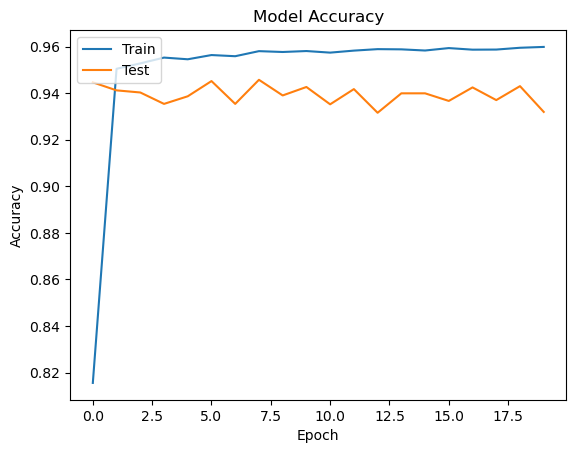

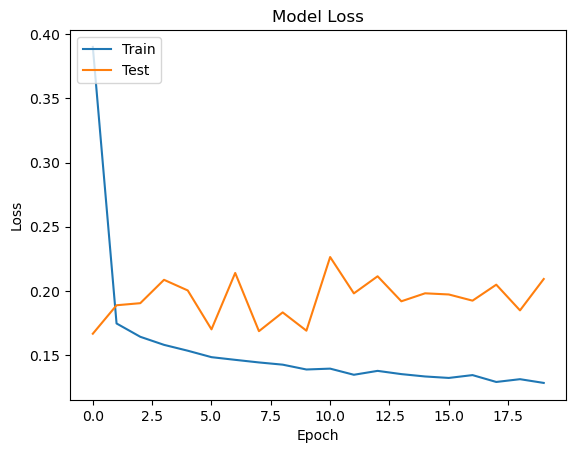

In [35]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

In [37]:
model.save("malaria_diagnosis.h5")

## 8. **Test ve Değerlendirme:**
   Eğitim tamamlandığında, modeli test verisi üzerinde değerlendirin. Modelin doğruluğunu, kesinliği, hassasiyeti ve geri çağırma gibi metriklerle değerlendirin. Bu, modelinizin gerçek dünya verilerinde nasıl performans gösterdiğini anlamanıza yardımcı olacaktır.

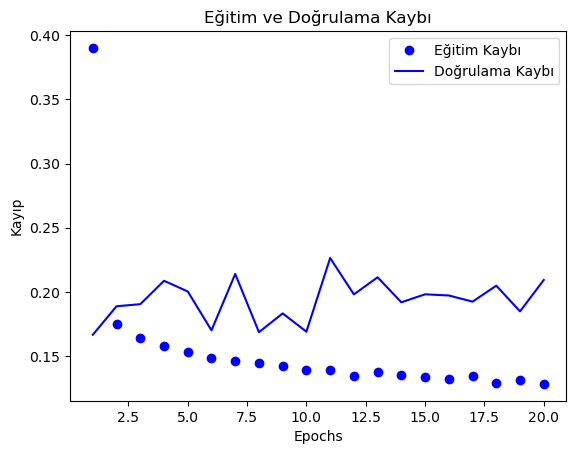

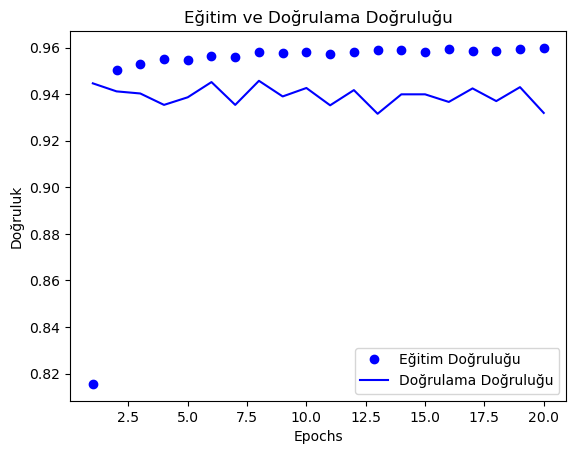

345/345 [==============================] - 16s 45ms/step
Sınıflandırma Raporu:
               precision    recall  f1-score   support

 Parasitized       0.50      1.00      0.67      2755
  Uninfected       0.00      0.00      0.00      2755

    accuracy                           0.50      5510
   macro avg       0.25      0.50      0.33      5510
weighted avg       0.25      0.50      0.33      5510

Confusion Matrix:
 [[2755    0]
 [2755    0]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# Modelin eğitim sürecindeki kayıp ve metrik değerlerini al
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Son eğitim epoch sayısını al
epochs = range(1, len(train_loss) + 1)

# Kayıp değerlerini görselleştirme
plt.plot(epochs, train_loss, 'bo', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

plt.show()

# Doğruluk değerlerini görselleştirme
plt.plot(epochs, train_accuracy, 'bo', label='Eğitim Doğruluğu')
plt.plot(epochs, val_accuracy, 'b', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Test verisini tahmin etme
predict_x = model.predict(valDatagen)
classes_x = np.argmax(predict_x, axis=1)

# Gerçek etiketleri al
y_true = valDatagen.classes

# Sınıflandırma raporu oluşturma
class_names = valDatagen.class_indices
class_labels = list(class_names.keys())

classification_rep = classification_report(y_true, classes_x, target_names=class_labels)
print("Sınıflandırma Raporu:\n", classification_rep)

# Confusion matrix oluşturma
conf_matrix = confusion_matrix(y_true, classes_x)
print("Confusion Matrix:\n", conf_matrix)

Yukarıdaki kod ile alakalı olarak:
1. **Model Eğitim İstatistiklerini Alma:**
   Eğitim işlemi sırasında her epoch sonunda elde edilen eğitim ve doğrulama (validation) istatistiklerini alıyoruz. Bunlar genellikle kayıp (loss) ve doğruluk (accuracy) değerleridir.

2. **Epoch Sayısını Alma:**
   Grafik çiziminde x eksenine koymak üzere epoch sayılarını alıyoruz.

3. **Eğitim ve Doğrulama Kayıp Değerlerini Görselleştirme:**
   Modelin eğitim sürecindeki kayıp değerlerini epoch sayılarına karşı çizdiriyoruz. Bu grafiği kullanarak, eğitimdeki kaybın nasıl değiştiğini izleyebiliriz.

4. **Eğitim ve Doğrulama Doğruluk Değerlerini Görselleştirme:**
   Modelin eğitim sürecindeki doğruluk değerlerini epoch sayılarına karşı çizdiriyoruz. Bu grafiği kullanarak, doğruluk değerinin nasıl değiştiğini izleyebiliriz.

5. **Test Verisini Tahmin Etme ve Değerlendirme:**
   Modeli eğittikten sonra, test verisini kullanarak modelin performansını değerlendiriyoruz. Tahmin sonuçlarından sınıflandırma raporu ve karışıklık matrisi hesaplanır. Bu adım, modelin gerçek dünya verilerinde nasıl performans gösterdiğini anlamamıza yardımcı olur.

Bu adımlar, model eğitim sürecini anlamak ve modelin performansını değerlendirmek için kullanılır. Veri bilimi ve makine öğrenmesi projelerinde bu tür değerlendirme adımları oldukça önemlidir çünkü modelin gerçek dünya uygulamalarındaki performansını anlamamıza yardımcı olurlar.

## 9. **Sonuçların Görselleştirilmesi:**
   Modelinizin test verilerindeki performansını görselleştirerek ve örnek tahminlerle destekleyerek sonuçları anlatın.

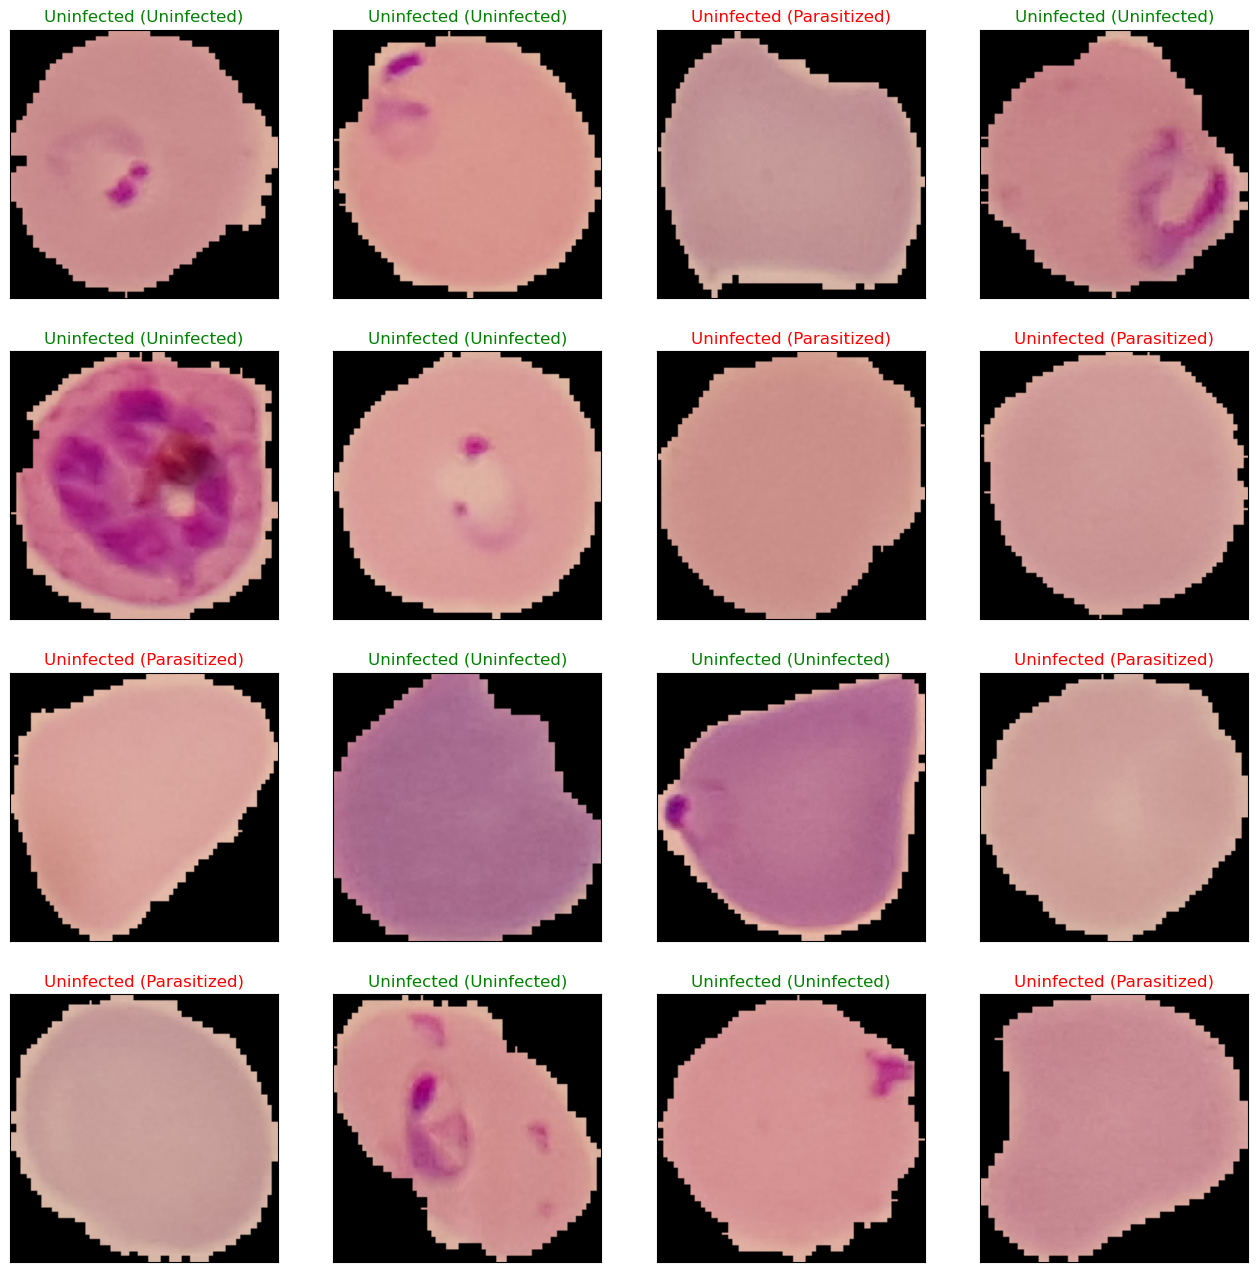

In [44]:
import numpy as np
import matplotlib.pyplot as plt

malaria_labels = ["Uninfected", "Parasitized"]
fig = plt.figure(figsize=(16, 16))

for i in range(16):  # 16 veri için döngü
    data, true_label = valDatagen[i]  # Veri ve gerçek etiketi al
    pred_idx = classes_x[i]  # Tahmin edilen sınıfı al
    
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(data[0])  # Veriyi al ve görselleştir
    true_idx = int(true_label[0])  # Gerçek etiketi al
    ax.set_title("{} ({})".format(malaria_labels[pred_idx], malaria_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

plt.show()

Şimdi de kod parçasını adım adım açıklıyoruz:

1. İlk olarak, gerekli kütüphaneleri (`numpy` ve `matplotlib.pyplot`) içe aktarıyorsunuz.

2. `malaria_labels` adında bir liste oluşturuyorsunuz. Bu liste, sınıfların isimlerini içerecektir. "Uninfected" (Enfekte Olmamış) ve "Parasitized" (Enfekte Olmuş) sınıf isimlerini içeriyor.

3. `fig` adında bir `plt.figure` nesnesi oluşturuyorsunuz. Bu, sonraki grafikleri içerecek bir "figure" (şekil) nesnesidir.

4. `range(16)` döngüsüyle, 0'dan başlayarak 15'e kadar (toplamda 16 defa) bir döngü oluşturuyorsunuz. Bu, 16 adet görüntü için işlem yapmanızı sağlar.

5. `valDatagen[i]` ifadesiyle, `valDatagen` veri üreticisinden `i` indeksli bir veri ve gerçek etiketi alıyorsunuz.

6. `classes_x[i]` ifadesiyle, `classes_x` dizisinden tahmin edilen sınıfı alıyorsunuz.

7. `fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])` ifadesiyle, her bir görüntünün yerleştirileceği bir alt çizim (subplot) ekleniyor. `4x4` bir düzen içinde görüntüler sıralanıyor.

8. `ax.imshow(data[0])` ifadesiyle, veriyi görselleştiriyorsunuz. `data` içindeki verinin ilk öğesi (görüntü) gösteriliyor.

9. `true_label[0]` ifadesiyle, gerçek etiketi alıp integer'a dönüştürüyorsunuz.

10. `ax.set_title("{} ({})".format(malaria_labels[pred_idx], malaria_labels[true_idx]), color=("green" if pred_idx == true_idx else "red"))` ifadesiyle, alt çizimin başlığı ayarlanıyor. Başlık, tahminin doğru veya yanlış olmasına göre yeşil veya kırmızı renkte olacak şekilde düzenleniyor.

11. `plt.show()` ile oluşturduğunuz figürü gösteriyorsunuz.

Sonuç olarak, bu kod parçası, `valDatagen` veri üreticisinden alınan verileri ve tahmin sonuçlarını kullanarak 16 adet görüntüyü görselleştiriyor. Her bir alt çizimde, tahminin doğru veya yanlış olmasına göre başlığın rengi farklılık gösteriyor. Bu şekilde, tahmin sonuçlarını görsel olarak anlamlayabilirsiniz.

## 10. **Dağıtım ve Kullanım:**
Modeliniz başarıyla eğitildiğinde, gerçek dünya uygulamalarında kullanılabilir hale getirebilirsiniz. Bu, yeni görüntülerinizi modelinize besleyerek sıtma enfeksiyonlarını tespit edebilirsiniz.

In [45]:
# Modeli kaydetme
model.save("malaria_model.h5")

In [3]:
# Modeli Yükleme ve Görüntü Tahmin Etme:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model

# Kaydedilen modeli yükle
loaded_model = load_model("malaria_model.h5")

# Tahmin etmek istediğiniz görüntüyü yükleyin ve boyutunu ayarlayın
image_path = "../10-Image Classification CNN for Malaria/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_105253_cell_100.png"  # Görüntünün yolu
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Görüntüyü modelde tahmin et
prediction = loaded_model.predict(img_array)
if prediction[0][0] > 0.5:
    result = "Parasitized"
else:
    result = "Uninfected"

print("Görüntü sınıfı:", result)

1/1 [==============================] - 0s 172ms/step
Görüntü sınıfı: Uninfected


#### Projede amaç, görüntü işleme ve derin öğrenme tekniklerini kullanarak sıtma enfeksiyonlarını tespit etmekti. Bu projenin sonucunda, eğitilen modeli kullanarak gerçek dünya verilerinde sıtma enfeksiyonlarını tespit edebilir ve sağlık alanında faydalı bir uygulama geliştirebiliriz.